In [24]:
# Install a pip package in the current Jupyter kernel
import sys

### General
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#from scipy.optimize import curve_fit
from tqdm import tqdm
import pandas as pd

### Query
from astroquery.sdss import SDSS

In [27]:
QUERY = "SELECT TOP 100 plate, mjd, fiberID, snMedian \
    FROM SpecObj \
    WHERE class = 'STAR' AND zWarning = 0 \
    "

df = pd.read_csv('data/custom-queries/stars.csv')
print(df)

    plate    mjd  fiberID   snMedian
0    6413  56336      522  69.327290
1    6413  56336      537   3.278365
2    6413  56336      548   3.870496
3    6413  56336      560  23.653220
4    6413  56336      562  11.197870
..    ...    ...      ...        ...
95   3105  54825      634  26.743160
96   3105  54825      635   7.333448
97   3105  54825      636  14.528100
98   3105  54825      637   6.594066
99   3105  54825      638  22.758220

[100 rows x 4 columns]


In [30]:
i = df['snMedian'].tolist().index(max(df['snMedian']))

xid = SDSS.get_spectra_async(plate=df['plate'][i], fiberID=df['fiberID'][i], mjd=df['mjd'][i])
url = str(xid[0]).split(' ')[4]
print(url)

https://data.sdss.org/sas/dr14/sdss/spectro/redux/v5_10_0/spectra/6413/spec-6413-56336-0522.fits


C:\Users\arsen\anaconda3\lib\site-packages\astroquery\sdss\core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [32]:
from astropy.io import fits
#star = fits.open(url)
star = fits.open('data/sample-star-spectrum.fits')

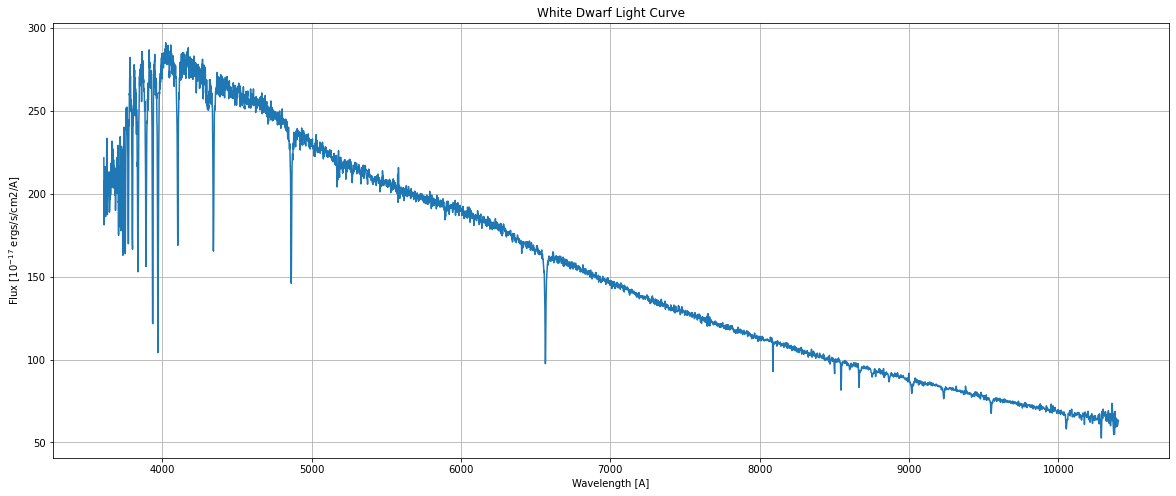

In [33]:
##### https://www.sdss.org/dr17/spectro/spectro_basics/
# https://data.sdss.org/datamodel/files/SPECTRO_REDUX/RUN2D/PLATE4/spCFrame.html

header = star[1].header
data = star[1].data

wavelength = 10**data['loglam']
flux = data['flux']
ivar = data['ivar']

plt.figure(figsize=(20,8))

plt.plot(wavelength, flux)
plt.grid()
plt.ylabel(r'Flux [$10^{-17}$ ergs/s/cm2/A]')
plt.xlabel(r'Wavelength [A]')
plt.title('White Dwarf Light Curve')
ax = plt.gca()

plt.show()